# Analyzing Oura Sleep Data

I woke up feeling pretty refreshed yesterday for the first time in a while. I wear an Oura ring to monitor my sleep, but of course I wanted to extract and graph the data myself. 😁 🤓

I'm now averaging the most sleep per night since my daughter was born last year. 😅

You can see a short video of how I made this in EMR Studio using a combination of my own personal #docker data extractors and a fun charting library I found for Python called cutecharts. https://youtu.be/aU6b70BTYUY

_note: I replaced cutecharts with Plotly in this notebook so it would render in HTML_

## Define a Docker extension

In [3]:
import subprocess
from io import StringIO

from IPython.core.magic import (register_line_magic, register_cell_magic)
import pandas as pd

def docker_pull(image):
    subprocess.call("docker pull f{image}", shell=True)

def docker_run(args):
    result = subprocess.run(["docker", "run", "--rm"] + args, capture_output=True)
    return result.stdout

def read_from_docker(docker_args, image_args):
    result = docker_run(docker_args + image_args)
    return pd.read_json(result, lines=True)

@register_cell_magic
def docker_data(line, cell):
    """
    line is the image and args to be used. Provided independently so we can always docker pull it
    cell is the arguments to be provided to docker run
    """
    image_args = line.split(" ")
    docker_args = StringIO(cell).getvalue().split()
    return read_from_docker(docker_args, image_args)

In [4]:
%%docker_data ghcr.io/dacort/crates-oura sleep
-e OURA_PAT
-e start=2020-07-01

,summary_date,period_id,is_longest,timezone,bedtime_end,bedtime_start,breath_average,duration,total,awake,...,score_total,temperature_deviation,temperature_trend_deviation,bedtime_start_delta,bedtime_end_delta,midpoint_at_delta,temperature_delta,hr_lowest,hr_average,activity_type
0,2020-07-01,0,1,-420,2020-07-02T07:37:03-07:00,2020-07-02T00:04:03-07:00,15.375,27180,23310,3870,...,70,-0.16,-0.04,243,27423,13113,-0.16,55,59.24,sleep
1,2020-07-02,0,1,-420,2020-07-03T08:17:02-07:00,2020-07-03T00:24:02-07:00,15.375,28380,23910,4470,...,72,0.21,0.08,1442,29822,14432,0.21,57,63.63,sleep
2,2020-07-03,0,1,-420,2020-07-04T08:27:29-07:00,2020-07-03T23:32:29-07:00,16.125,32100,30240,1860,...,96,-0.17,0.08,-1651,30449,14099,-0.17,55,61.42,sleep
3,2020-07-04,0,1,-420,2020-07-05T08:19:59-07:00,2020-07-04T23:40:59-07:00,16.375,31140,27570,3570,...,87,0.15,0.15,-1141,29999,14189,0.15,54,65.19,sleep
4,2020-07-05,1,1,-420,2020-07-06T06:37:19-07:00,2020-07-05T23:05:19-07:00,16.375,27120,20730,6390,...,59,0.22,0.25,-3281,23839,10819,0.22,55,63.21,sleep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,2021-05-20,0,1,-420,2021-05-21T05:24:28-07:00,2021-05-20T23:57:28-07:00,15.500,19620,18810,810,...,51,-0.41,0.00,-152,19468,9478,-0.41,54,58.28,sleep
318,2021-05-21,0,1,-420,2021-05-22T07:20:16-07:00,2021-05-21T23:25:16-07:00,15.875,28500,26970,1530,...,85,0.04,0.00,-2084,26416,11956,0.04,56,61.72,sleep
319,2021-05-22,0,1,-420,2021-05-23T07:21:00-07:00,2021-05-22T23:26:00-07:00,15.875,28500,26400,2100,...,82,0.03,0.04,-2040,26460,11850,0.03,57,63.47,sleep
320,2021-05-23,0,1,-420,2021-05-24T06:21:09-07:00,2021-05-23T23:27:09-07:00,15.750,24840,22230,2610,...,65,-0.10,0.07,-1971,22869,9999,-0.10,56,61.71,sleep


In [5]:
df = _
df.describe()

,period_id,is_longest,timezone,breath_average,duration,total,awake,rem,deep,light,...,score_rem,score_total,temperature_deviation,temperature_trend_deviation,bedtime_start_delta,bedtime_end_delta,midpoint_at_delta,temperature_delta,hr_lowest,hr_average
count,322.000000,322.0,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,...,322.000000,322.000000,322.000000,321.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,0.226708,1.0,-444.223602,15.694488,27623.478261,22383.633540,5239.844720,5687.608696,4704.875776,11991.149068,...,81.291925,65.804348,-0.009969,0.077601,-991.639752,26631.838509,12654.167702,-0.009969,57.307453,63.917391
std,0.506808,0.0,29.484454,0.386411,3523.311997,3048.484966,2343.953109,1497.637453,1339.582449,2263.716429,...,17.137756,12.495815,0.175968,0.112217,1877.587335,3268.591938,2110.125161,0.175968,2.964253,3.531511
min,0.000000,1.0,-480.000000,14.625000,15720.000000,11520.000000,810.000000,1500.000000,630.000000,5970.000000,...,22.000000,23.000000,-0.570000,-0.290000,-8877.000000,14704.000000,6359.000000,-0.570000,50.000000,54.800000
25%,0.000000,1.0,-480.000000,15.500000,26115.000000,20340.000000,3540.000000,4747.500000,3720.000000,10470.000000,...,71.000000,57.000000,-0.140000,0.000000,-2113.250000,25370.250000,11496.750000,-0.140000,55.250000,61.622500
50%,0.000000,1.0,-420.000000,15.750000,27960.000000,22590.000000,5100.000000,5730.000000,4650.000000,11940.000000,...,87.000000,67.000000,-0.005000,0.070000,-927.500000,26987.500000,12832.500000,-0.005000,57.000000,63.945000
75%,0.000000,1.0,-420.000000,15.875000,29580.000000,24472.500000,6720.000000,6510.000000,5610.000000,13620.000000,...,95.000000,74.000000,0.090000,0.150000,27.000000,28598.500000,13954.250000,0.090000,59.000000,66.047500
max,4.000000,1.0,-420.000000,17.500000,37440.000000,31980.000000,13140.000000,9750.000000,9210.000000,17670.000000,...,100.000000,99.000000,0.520000,0.370000,5079.000000,32789.000000,17593.000000,0.520000,68.000000,75.480000


## Summarize data by month

In [6]:
import pandas

df.index = pandas.to_datetime(df['summary_date'],format='%Y-%m-%d')
dfGrouped = df.groupby(pandas.Grouper(freq='M')).mean()
dfGrouped.total

summary_date
2020-07-31    20723.793103
2020-08-31    20672.903226
2020-09-30    22339.000000
2020-10-31    22789.000000
2020-11-30    21731.000000
2020-12-31    23755.862069
2021-01-31    23049.677419
2021-02-28    22135.555556
2021-03-31    22291.935484
2021-04-30    23185.000000
2021-05-31    23841.250000
Freq: M, Name: total, dtype: float64

In [7]:
dfGrouped.index.strftime("%b %Y").tolist()

['Jul 2020',
 'Aug 2020',
 'Sep 2020',
 'Oct 2020',
 'Nov 2020',
 'Dec 2020',
 'Jan 2021',
 'Feb 2021',
 'Mar 2021',
 'Apr 2021',
 'May 2021']

In [8]:
(dfGrouped.total/60/60).round(2).tolist()

[5.76, 5.74, 6.21, 6.33, 6.04, 6.6, 6.4, 6.15, 6.19, 6.44, 6.62]

## Draw a chart!

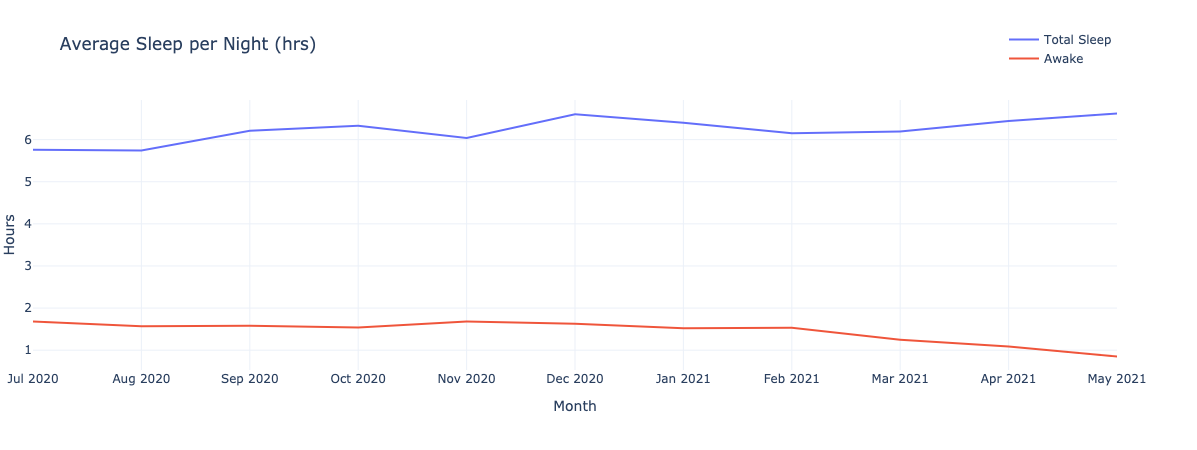

In [9]:
import plotly.offline as py
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=dfGrouped.index.strftime("%b %Y").tolist(), y=(dfGrouped.total/60/60).round(2).tolist(),
                    mode='lines',
                    name='Total Sleep'))
fig.add_trace(go.Scatter(x=dfGrouped.index.strftime("%b %Y").tolist(), y=(dfGrouped.awake/60/60).round(2).tolist(),
                    mode='lines',
                    name='Awake'))

# fig.show()
#py.iplot(fig)
# Add title, x axis label, and specify template which is defined above 
fig.update_layout(title='Average Sleep per Night (hrs)',
                  xaxis_title='Month',
                  yaxis_title='Hours',
                  template='plotly_white',
                  margin_l=0,
                  width=825,
                  autosize=False,
                  legend=dict(
                    yanchor="bottom",
                    y=1.1,
                    xanchor="right",
                    x=1
                ))

# Use jupyterlab renderer for great exporting
fig.show(renderer="jupyterlab")